# Matriculando alunos
## Preaparando ambiente

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(20, 10))

In [2]:
!pip3 install html5lib
!pip install lxml

In [3]:
import html5lib

## Carregando dados
### Nomes

In [4]:
nomes = pd.read_json('dados/nomes.json')
nomes

,id_aluno,nome,email
0,235,MARIA,maria@dominio.com.br
1,43,JOSE,jose@dominio.com.br
2,304,ANA,ana@dominio.com.br
3,156,JOAO,joao@dominio.com.br
4,343,ANTONIO,antonio@dominio.com.br
...,...,...,...
395,231,WALTER,walter@dominio.com.br
396,99,ARLINDO,arlindo@dominio.com.br
397,323,MICHAEL,michael@dominio.com.br
398,383,ALVARO,alvaro@dominio.com.br


In [6]:
nomes.set_index('id_aluno', inplace = True)
nomes

,nome,email
id_aluno,,
235,MARIA,maria@dominio.com.br
43,JOSE,jose@dominio.com.br
304,ANA,ana@dominio.com.br
156,JOAO,joao@dominio.com.br
343,ANTONIO,antonio@dominio.com.br
...,...,...
231,WALTER,walter@dominio.com.br
99,ARLINDO,arlindo@dominio.com.br
323,MICHAEL,michael@dominio.com.br


### Cursos

In [7]:
cursos = pd.read_json('dados/cursos.json')
cursos

,nome_do_curso
1,Lógica de programação
10,Código limpo com C#
11,Preparatório para certificação Java
12,Hardware básico
13,Persistência com .NET
14,Desenvolvendo jogos
15,Análise de dados
16,Estatística básica
17,Internet das coisas
18,Programação funcional


In [8]:
cursos.index.name = 'id'
cursos

,nome_do_curso
id,
1,Lógica de programação
10,Código limpo com C#
11,Preparatório para certificação Java
12,Hardware básico
13,Persistência com .NET
14,Desenvolvendo jogos
15,Análise de dados
16,Estatística básica
17,Internet das coisas


## Matrículas
### Informando o número de cursos de cada aluno

In [19]:
total_alunos = len(nomes)
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)
nomes.sample(20)

,nome,email,matriculas
id_aluno,,,
149,ANGELA,angela@dominio.com.br,5
216,VALMIR,valmir@dominio.com.br,1
313,MARA,mara@dominio.com.br,1
299,TANIA,tania@dominio.com.br,1
197,ERICA,erica@dominio.com.br,1
292,RAIMUNDA,raimunda@dominio.com.br,1
132,TAINA,taina@dominio.com.br,10
298,RAQUEL,raquel@dominio.com.br,1
380,REGINA,regina@dominio.com.br,4


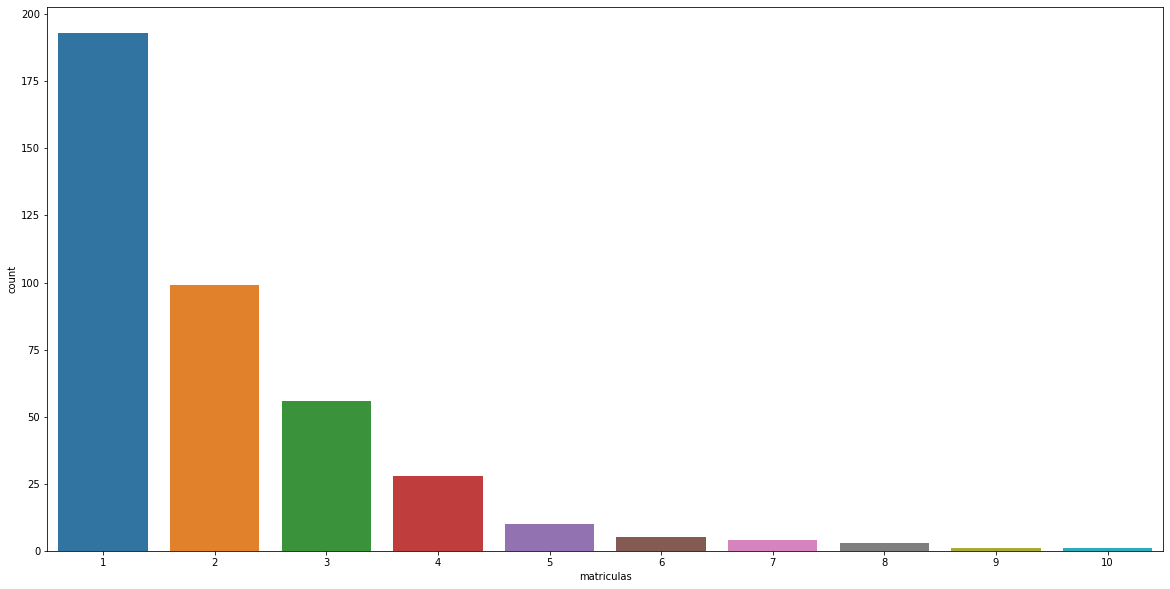

In [20]:
sns.countplot(data = nomes, x = 'matriculas');

In [21]:
nomes.matriculas.describe()

count    400.000000
mean       2.055000
std        1.460242
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [22]:
nomes.matriculas.value_counts()

1     193
2      99
3      56
4      28
5      10
6       5
7       4
8       3
10      1
9       1
Name: matriculas, dtype: int64

### Associando alunos aos cursos

In [23]:
len(cursos)

20

In [29]:
max(cursos.index)

20

In [53]:
matriculas_alunos = []
# cria uma sequencia de n valores aleatórios entre 0 e 1, sendo o n = número de cursos
x = np.random.rand(len(cursos))
# Cria uma probabilidade para que cada curso seja o curso que o aluno está fazendo
prob_curso = x / sum(x)
prob_curso

array([0.00182582, 0.09170209, 0.00611553, 0.06364754, 0.08267508,
       0.00150442, 0.08009259, 0.02563813, 0.00467404, 0.05522484,
       0.00227335, 0.01626407, 0.01691915, 0.03708152, 0.11214839,
       0.06048568, 0.08872058, 0.10846958, 0.03829831, 0.10623928])

In [54]:
x

array([0.01438925, 0.7227029 , 0.04819638, 0.50160537, 0.6515612 ,
       0.01185632, 0.63120864, 0.20205374, 0.03683606, 0.43522624,
       0.01791628, 0.12817695, 0.13333957, 0.29223897, 0.88383997,
       0.47668686, 0.69920569, 0.85484733, 0.30182845, 0.8372703 ])

In [55]:
for i, row in nomes.iterrows():
    id = i
    matriculas = row.matriculas
    for j in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob_curso)]
        matriculas_alunos.append(mat)
        
matriculas_alunos

[[235, 7],
 [235, 10],
 [235, 7],
 [43, 4],
 [43, 12],
 [43, 15],
 [304, 9],
 [156, 4],
 [343, 4],
 [310, 10],
 [310, 9],
 [55, 13],
 [288, 4],
 [288, 13],
 [288, 15],
 [379, 9],
 [379, 13],
 [379, 9],
 [379, 18],
 [92, 4],
 [92, 15],
 [174, 20],
 [174, 18],
 [174, 4],
 [174, 3],
 [218, 9],
 [217, 7],
 [217, 15],
 [217, 2],
 [34, 5],
 [34, 9],
 [185, 4],
 [185, 9],
 [347, 18],
 [347, 5],
 [347, 9],
 [191, 6],
 [191, 15],
 [163, 13],
 [42, 6],
 [42, 13],
 [42, 15],
 [10, 9],
 [10, 11],
 [10, 6],
 [10, 15],
 [10, 10],
 [10, 13],
 [200, 15],
 [200, 10],
 [287, 9],
 [287, 12],
 [287, 7],
 [80, 9],
 [80, 5],
 [80, 12],
 [80, 18],
 [173, 15],
 [173, 5],
 [173, 11],
 [173, 13],
 [173, 10],
 [16, 3],
 [49, 8],
 [49, 4],
 [12, 12],
 [240, 10],
 [242, 13],
 [328, 7],
 [328, 7],
 [172, 4],
 [172, 3],
 [103, 13],
 [103, 13],
 [284, 10],
 [192, 10],
 [192, 16],
 [192, 6],
 [192, 2],
 [350, 4],
 [262, 8],
 [262, 12],
 [262, 15],
 [262, 6],
 [338, 9],
 [333, 6],
 [333, 3],
 [333, 4],
 [76, 7],
 [297,

In [56]:
matriculas = pd.DataFrame(matriculas_alunos, columns = ['id_aluno', 'id_curso'])
matriculas.sample(10)

,id_aluno,id_curso
650,141,5
157,53,10
70,172,4
244,190,13
630,47,15
698,245,6
562,239,15
660,266,6
662,223,16
730,332,3


In [60]:
matriculasCurso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_alunos'})
matriculasCurso

,quantidade_alunos,nome_do_curso
id_curso,,
1,2,Lógica de programação
2,18,Java para Web
3,27,C# para Web
4,97,Ruby on Rails
5,50,Cursos de Python
6,77,PHP com MySql
7,81,.NET para web
8,39,Novas integrações com Java
9,88,TDD com Java


## Salvando os dados

In [64]:
matriculasCurso.reset_index(inplace = True)

In [65]:
matriculasCurso.sample(10)

,id_curso,quantidade_alunos,nome_do_curso
5,6,77,PHP com MySql
17,18,46,Programação funcional
4,5,50,Cursos de Python
18,20,10,Orientação objetos com Java
0,1,2,Lógica de programação
2,3,27,C# para Web
16,17,5,Internet das coisas
6,7,81,.NET para web
14,15,56,Análise de dados
1,2,18,Java para Web


In [66]:
matriculasCurso.to_json('dados/matriculas_curso.json')

In [67]:
pd.read_json('dados/matriculas_curso.json')

,id_curso,quantidade_alunos,nome_do_curso
0,1,2,Lógica de programação
1,2,18,Java para Web
2,3,27,C# para Web
3,4,97,Ruby on Rails
4,5,50,Cursos de Python
5,6,77,PHP com MySql
6,7,81,.NET para web
7,8,39,Novas integrações com Java
8,9,88,TDD com Java
9,10,74,Código limpo com C#


In [68]:
matriculas.to_json('dados/matriculas.json')

In [69]:
nomes

,nome,email,matriculas
id_aluno,,,
235,MARIA,maria@dominio.com.br,3
43,JOSE,jose@dominio.com.br,3
304,ANA,ana@dominio.com.br,1
156,JOAO,joao@dominio.com.br,1
343,ANTONIO,antonio@dominio.com.br,1
...,...,...,...
231,WALTER,walter@dominio.com.br,2
99,ARLINDO,arlindo@dominio.com.br,1
323,MICHAEL,michael@dominio.com.br,2


In [70]:
nomes.to_json('dados/nomes.json')